# **CAPSTONE 2**
Module 2 - Data Analysis

Muhammad Rasyaa Alif Fauzan

JCDS-0408-006


# I. Latar Belakang

Sebuah perusahaan Software-as-a-Service (SaaS) melakukan pemasaran dan penjualan/penyewaan lisensi *software* ke perusahaan/bisnis lain (*customer*) secara *Business-to-Business* (B2B). 

# II. Pernyataan Masalah

Sebagai *data analyst*, kita akan menjawab pertanyaan berikut:

**Bagaimana karakteristik customer yang melakukan pemesanan pada perusahaan SaaS ini?**

Dari pertanyaan di atas, kita juga dapat memberi rekomendasi bagaimana cara memaksimalkan *Sales* dan *Profit* pada pasar SaaS ini.

# III. *Data Summary*

## A. Penjelasan Dataset

Dataset yang dihasilkan berupa pemesanan produk yang dilakukan oleh *customer* di setiap *region* yang berbeda dan *sales*, *quantity*, *discount* dan *profit* dari produk. *Customer* terbagi dalam beberapa pendataan berupa ID, tanggal, negara, kota, *region*, *subregion*, *industry*, *segment*, produk, dan kunci lisensi . 

Dataset asli dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).

Terdapat 19 kolom di dalam dataset SaaS-Sales, yaitu:

|No.|Nama Kolom|Tipe Data|Deskripsi|
|-|-|-|-|
|1.|`Row ID`|object| Identifikasi unik untuk setiap transaksi|
|2.|`Order ID`|object|Identifikasi unik untuk setiap pemesanan|
|3.| `Order Date`|object|Tanggal saat pemesanan dilakukan|
|4.| `Date Key`|object|Representasi numerikal untuk `Order Date` (YYYYMMDD)|
|5.| `Contact Name`|object|Nama pelanggan yang melakukan pemesanan|
|6.| `Country`|object|Negara tempat dilakukan pemesanan|
|7.|`City`|object|Kota tempat dilakukan pemesanan|
|8.|`Region`|object|*Region* tempat dilakukan pemesanan|
|9.|`Subregion`|object|*Subregion* tempat dilakukan pemesanan|
|10.| `Customer`|object|Nama bisnis yang melakukan pemesanan|
|11.| `Customer ID`|object|Identifikasi unik untuk setiap `Customer`|
|12.| `Industry`|object|Industri setiap `Customer`|
|13.| `Segment`|object|Segmen setiap `Customer` (SMB, Strategic, Enterprise, dll.).|
|14.| `Product`|object|Produk yang telah dipesan|
|15.| `License`|object|Kunci lisensi setiap `Product`|
|16.| `Sales`|float|Jumlah total penjualan setiap transaksi|
|17.| `Quantity`|int|Jumlah total `Product` setiap transaksi|
|18.| `Discount`|float|Potongan harga setiap transaksi|
|19.| `Profit`|float|Keuntungan yang didapat setiap transaksi|



## B. *Read Data*

In [508]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from matplotlib import ticker

import warnings
warnings.filterwarnings("ignore")

In [509]:
df=pd.read_csv('SaaS-Sales.csv', parse_dates=['Order Date'])        # parse_dates untuk mengubah tipe data objek menjadi datetime
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# IV. *Data Understanding and Data Cleaning*

Sebelum melakukan *Data Analysis*, dilakukan terlebih dahulu *Data Understanding* dan *Data Cleaning*. Proses ini dapat menjabarkan info dan anomali yang terdapat pada dataset, lalu dirapihkan dan dibersihkan melalui proses *Data Cleaning*.

## A. *Data Understanding*

### *Shape and Info*

In [510]:
print(f'Jumlah baris dan kolom pada Dataset ini adalah: {df.shape}')
df.info()

Jumlah baris dan kolom pada Dataset ini adalah: (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null  

In [511]:
pd.set_option('display.max_colwidth',1)
# data unik di tiap kolom
listItem=[]
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2

Kita dapat melihat bahwa:
* Jumlah kolom dan baris pada dataset ini adalah 9994 dan 19
* Dataset ini mencakup tahun 2020 sampai 2023
* Terdapat 48 jumlah region
* Terdapat 10 jumlah industri
* Terdapat 99 jumlah customer
* Produk-produk terjual yang terdata dalam dataset SaaS-Sales adalah:

|No.|Produk|Deskripsi|
|-|-|-|
|1.|Marketing Suite| Perangkat untuk mengelola aktivitas *marketing*|
|2.|FinanceHub| Perangkat untuk manajemen dan pengelolaan keuangan|
|3.|ContactMatcher| Perangkat untuk mengelola dan manajemen kontak bisnis/*customer*|
|4.|Marketing Suite - Gold| Versi premium dari perangkat Marketing Suite (tambahan fitur baru)|
|5.|SaaS Connector Pack| Perangkat integrasi untuk memudahkan koneksi dan berbagi data sesama pengguna aplikasi SaaS|
|6.|ChatBot Plugin| Perangkat integrasi fungsi dari chatbot ke dalam aplikasi|
|7.|Site Analytics| Perangkat analisis untuk performa situs *website*|
|8.|OneView| Perangkat *dashboard* untuk metrik bisnis|
|9.|Support| Platform *Customer Support*|
|10.|Data Smasher| Perangkat untuk prosesi dan analisis dataset yang besar|
|11.|SaaS Connector Pack - Gold| Versi premium dari perangkat SaaS Connector Pack (tambahan fitur baru)|
|12.|Storage| Layanan *Cloud Storage* (Penyimpanan cloud)|
|13.|Big Ol Database| Perangkat *Database solution* (mengelola dan mengatur penyimpanan data) dalam skala besar|
|14.|Alchemy| Perangkat data transformasi dan analisis untuk *Machine Learning*|


*Software* yang dijual oleh perusahaan SaaS ini merupakan perangkat yang digunakan oleh *stakeholder* untuk mendukung kemudahan bisnis.

* Segmen bisnis yang terdata dalam dataset SaaS-Sales adalah:

|No.|Segmen|Deskripsi|
|-|-|-|
|1.|SMB (*Small and Midsize Business*)| Bisnis dalam skala kecil/menengah (*small purchase behavior*)|
|2.|Strategic| Bisnis dengan nilai strategis tinggi (*larger purchase behavior*)|
|3.|Enterprise| Bisnis dalam skala besar (*very large purchase behavior*)|

[Sumber](https://www.linkedin.com/pulse/major-differences-between-selling-smb-enterprise-companies-bellew-jjlcf/) Artikel Segmen Bisnis.

### *Missing Value*

In [512]:
# Jumlah missing value 
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Dalam dataset ini kita tidak menemukan *Missing Value*.

### *Duplicate*

In [513]:
# Jumlah duplikat
print(f'Jumlah nilai duplikat pada dataset ini adalah: {df.duplicated().sum()}')

Jumlah nilai duplikat pada dataset ini adalah: 0


Dalam dataset ini kita tidak menemukan *Duplicate*.

### *Outlier*

In [514]:
# Cek ada berapa outlier pada kolom Sales, Quantity, Discount, Profit
for i in df.columns[15:]:
    Q1, Q3=np.quantile(df[i],[0.25,0.75])
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outlier_count=df[(df[i]<lower_bound)|(df[i]>upper_bound)][i].count()
    print(f'Kolom {i}, Jumlah Outlier: {outlier_count}')

Kolom Sales, Jumlah Outlier: 1167
Kolom Quantity, Jumlah Outlier: 170
Kolom Discount, Jumlah Outlier: 856
Kolom Profit, Jumlah Outlier: 1881


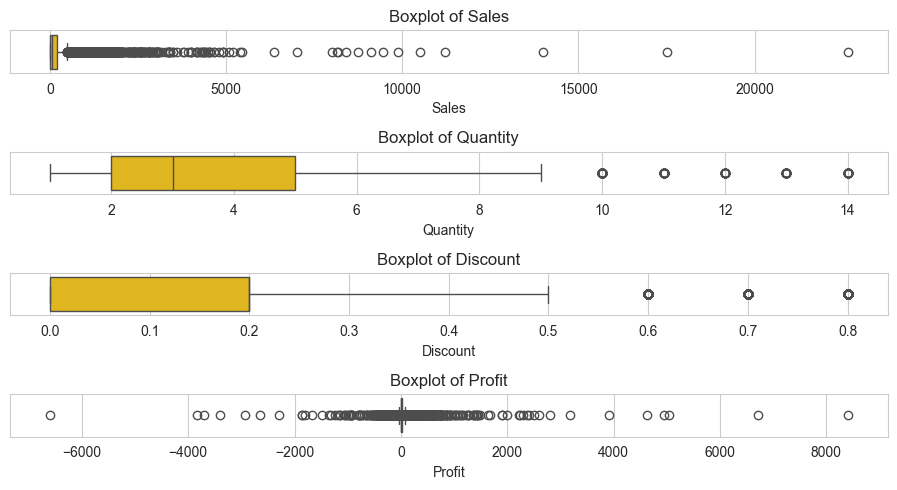

In [515]:
# Agar mudah terlihat, visualisasikan outlier dengan menggunakan boxplot
plt.figure(figsize=(18, 5))

for index, col in enumerate(df.columns[15:]):
    # Visualisasi Boxplot
    plt.subplot(len(df.columns[15:]), 2, index * 2 + 1)
    sns.boxplot(x=df[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Dari boxplot tersebut dapat dilihat bahwa:
* Terdapat outlier pada seluruh distribusi data numerikal:
    * Kolom Sales memiliki jumlah outlier sebanyak 1167
    * Kolom Quantity memiliki jumlah outlier sebanyak 170
    * Kolom Discount memiliki jumlah outlier sebanyak 856
    * Kolom Profit memiliki jumlah outlier sebanyak 1881
* Dapat terlihat pada boxplot di atas bahwa data memiliki outlier ekstrim pada kolom `Sales` dan `Profit`

### Kesimpulan Penjabaran Dataset

Dalam penjabaran data ini, dapat disimpulkan bahwa:
* Dataset SaaS-Sales memiliki 9994 baris dan 19 kolom
* Dataset ini tidak ditemukan data duplikat
* Dataset ini tidak memiliki data kosong/NaN
* Kolom `Order Date` masih berada dalam format object, oleh karena itu perlu dilakukan perubahan format *datetime*
* Terdapat satu kolom yang hilang dalam hubungan `Sales`, `Quantity`, `Discount`, dan `Profit` - yaitu "Cost". Oleh karena itu, akan dibuat colom baru bernama "Cost"
* Untuk menunjang analisis, kolom "Gross Profit" dan "Gross Profit Margin" akan ditambah ke dalam dataset
* Terkait outlier, dibuat beberapa keputusan:
    * Kolom `Profit` memiliki data yang negatif. Data tidak akan dilakukan apa-apa (data `Profit` negatif akan dianggap "Profit Lost")
    * Outlier ekstrim yang berada pada kolom `Sales` dan `Profit` akan dipertahankan
* Untuk memudahkan *Data Analysis*, beberapa kolom yang dianggap tidak relevan akan dihapus. Berikut kolom-kolom yang akan dihapus:
    * Kolom `Row ID` merupakan identifikasi unik dari dataset, sehingga tidak relevan dan dapat dihapus
    * Kolom  `Customer ID` sudah terwakili oleh kolom `Order ID`, sehingga kolom `Customer ID` dapat dihapus
    * Kolom `Date Key` dan `Contact Name` sudah terwakili oleh kolom lain (`Order Date` dan `Company`), sehingga dapat dihapus
    * Kolom `License` merupakan kolom lisensi dari produk, diputuskan tidak relevan sehingga dapat dihapus

## B. *Data Cleaning*

### Cek Order ID

Order ID memiliki format penulisan tersendiri:

"Region"-"Tahun Pemesanan"-"ID"

Untuk melihat apakah data "Region" dan "Tahun Pemesanannya" sesuai dengan kolom `Region` dan `Order Date` (tahunnya saja), maka perlu dilakukan pengecekan.
Jika terdapat data yang berbeda, akan dipertanyakan apakah kolom `Region` atau `Order Date` valid atau tidak

In [516]:
import re

# Membuat DataFrame baru yang berasal dari pemecahan "Order ID"
id_list=[]
for i in range(df.shape[0]):
    id_list.append(re.findall('\w+',df['Order ID'][i]))
df_id=pd.DataFrame(id_list).rename(columns={0:'Region ID',1:'Order Year',2:'ID'})   # DataFrame baru memiliki 3 kolom (Region ID, Order Year, ID)
df_id['Order Year'] = pd.to_datetime(df_id['Order Year'])
display(df_id)      # Order Year terdefault pada tanggal 1 bulan 1 (dikarenakan format datetime), akan tetapi tahun masih tetap sama

# Menyamakan Region ID(df_id) dengan Region (df)
df_sort_region=pd.DataFrame(df_id['Region ID'].isin(df['Region']))
df_regfalse=df_sort_region[df_sort_region['Region ID']==False]                      # Jika ditemukan region yang berbeda, akan terfilter 
print(f'Jumlah Region yang berbeda: {df_regfalse.count().iloc[0]}')


# Menyamakan Order Year(df_id) dengan Order Date (df)
df_sort_year=pd.DataFrame((df_id['Order Year'].dt.year).isin(df['Order Date'].dt.year))
df_yearfalse=df_sort_region[df_sort_region['Region ID']==False]                     # Jika ditemukan tahun yang berbeda, akan terfilter
print(f'Jumlah Tahun yang berbeda: {df_yearfalse.count().iloc[0]}')

,Region ID,Order Year,ID
0,EMEA,2022-01-01,152156
1,EMEA,2022-01-01,152156
2,AMER,2022-01-01,138688
3,EMEA,2021-01-01,108966
4,EMEA,2021-01-01,108966
...,...,...,...
9989,EMEA,2020-01-01,110422
9990,AMER,2023-01-01,121258
9991,AMER,2023-01-01,121258
9992,AMER,2023-01-01,121258


Jumlah Region yang berbeda: 0
Jumlah Tahun yang berbeda: 0


Setelah melakukan pengecekan *Order ID* dapat disimpulkan bahwa dataset tidak memiliki kesalahan penulisan atau *misinput* pada kolom `Order Date` ataupun `Region`.

### Menambah Kolom

Kolom yang akan ditambah adalah "Cost", "Gross Profit", dan "Gross Profit Margin". 

*Cost* adalah biaya yang langsung diatribusikan pada produk yang dijual oleh perusahaan. Dalam kasus ini perusahaan berupa perusahaan SaaS, dan produk yang dijual berupa *software*. Berikut rumus perhitungan dari "Cost":
$$Cost = Sales-Profit-Discount Amount$$

*Gross Profit* adalah profit yang didapat oleh penjual (perusahaan SaaS) setelah memperhitungkan "Cost". Berikut rumus perhitungan dari "Gross Profit" jika dihitung melalui jumlah *sales*:
$$Gross Profit = Sales-Cost$$

*Gross Profit Margin* adalah rasio keuangan yang menghitung *gross profit* perusahaan setelah mengurangi biaya langsung produksi barang. Berikut rumus perhitungan dari "Gross Profit Margin" jika dihitung melalui jumlah *sales*:
$$Gross Profit Margin = Gross Profit/Sales*100$$

In [517]:
# Menghitung cost
df['Cost']= df['Sales'] - df['Profit'] - (df['Discount']*df['Sales'])

# Menghitung gross profit
df['Gross Profit'] = df['Sales'] - df['Cost']

# Menghitung gross profit margin
df['Gross Profit Margin'] = (df['Gross Profit'] / df['Sales']) * 100

### Hapus kolom tidak perlu

In [518]:
df=df.drop(columns=['Row ID','Date Key','Contact Name','Customer ID','License'])
display(df.head(),df.tail())

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Cost,Gross Profit,Gross Profit Margin
0,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,220.046400,41.913600,16.00
1,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,512.358000,219.582000,30.00
2,AMER-2022-138688,2022-06-13,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,7.748600,6.871400,47.00
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,909.698625,47.878875,5.00
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,15.378000,6.990000,31.25


,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Cost,Gross Profit,Gross Profit Margin
9989,EMEA-2020-110422,2020-01-22,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,25.248,3,0.2,4.1028,16.0956,9.1524,36.25
9990,AMER-2023-121258,2023-02-27,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,91.960,2,0.0,15.6332,76.3268,15.6332,17.00
9991,AMER-2023-121258,2023-02-27,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,258.576,2,0.2,19.3932,187.4676,71.1084,27.50
9992,AMER-2023-121258,2023-02-27,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,29.600,4,0.0,13.3200,16.2800,13.3200,45.00
9993,AMER-2023-119914,2023-05-05,United States,Dallas,AMER,NAMER,Comcast,Communications,SMB,OneView,243.160,2,0.0,72.9480,170.2120,72.9480,30.00


### Data Bersih

Data yang sudah bersih akan diolah kembali untuk data analisis dan juga visualisasi dalam aplikasi Tableu.

Berikut informasi dari data yang sudah bersih:

In [519]:
list_item=[]
for col in df.columns:
    list_item.append([
        col, 
        df[col].dtype, 
        df[col].isna().sum(),
        df[col].nunique(), 
        list(df[col].drop_duplicates().sample(2).values)
        ])

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Unique', 'Unique Sample'],
                     data=list_item,
        )
print(df.shape)
dfDesc

(9994, 17)


,Data Features,Data Type,Null,Unique,Unique Sample
0,Order ID,object,0,5009,"[APJ-2023-162936, AMER-2023-169901]"
1,Order Date,datetime64[ns],0,1237,"[2023-06-22T00:00:00.000000000, 2022-12-20T00:00:00.000000000]"
2,Country,object,0,48,"[Sweden, South Africa]"
3,City,object,0,262,"[Manaus, Everett]"
4,Region,object,0,3,"[EMEA, APJ]"
5,Subregion,object,0,12,"[APAC, UKIR]"
6,Customer,object,0,99,"[Cisco Systems, Home Depot]"
7,Industry,object,0,10,"[Transportation, Consumer Products]"
8,Segment,object,0,3,"[SMB, Enterprise]"
9,Product,object,0,14,"[SaaS Connector Pack - Gold, Big Ol Database]"


Sebelum dibersihkan, dataset memiliki 19 kolom, setelah dibersihkan menjadi 17 kolom. Terdapat 5 kolom yang dihapus dan terdapat 3 kolom ditambahkan pada dataset.

In [520]:
#df.to_csv('SaaS-Sales-New.csv')

# V. *Data Analysis*

Pertama-tama, mari kita lihat apakah data dari seluruh variabel numerik terdistribusi normal atau tidak.
Data variabel numerik mencakup `Sales`, `Quantity`, `Discount`, `Profit`, `Cost`, `Gross profit`, dan `Gross Profit Margin`.

In [521]:
# Membuat dataframe baru dan mencari p-value menggunakan tes statstik D'Agostino-Pearson
dist=[]
for i in range(len(df.columns[10:])):
    feature_name=df.columns[10:][i]
    stat, p_value=normaltest(df[feature_name])
    
    if p_value>0.05:
        distribution='Terdistribusi Normal'
    else:
        distribution='Tidak terdistribusi Normal'
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df=pd.DataFrame(dist, columns=['Fitur', "Statistik D'Agostino-Pearson", 'P-value', 'Distribusi'])
dist_df

,Fitur,Statistik D'Agostino-Pearson,P-value,Distribusi
0,Sales,18033.308498,0.0,Tidak terdistribusi Normal
1,Quantity,2148.018022,0.0,Tidak terdistribusi Normal
2,Discount,2977.822121,0.0,Tidak terdistribusi Normal
3,Profit,14363.736244,0.0,Tidak terdistribusi Normal
4,Cost,15653.657396,0.0,Tidak terdistribusi Normal
5,Gross Profit,20559.683505,0.0,Tidak terdistribusi Normal
6,Gross Profit Margin,6985.530377,0.0,Tidak terdistribusi Normal


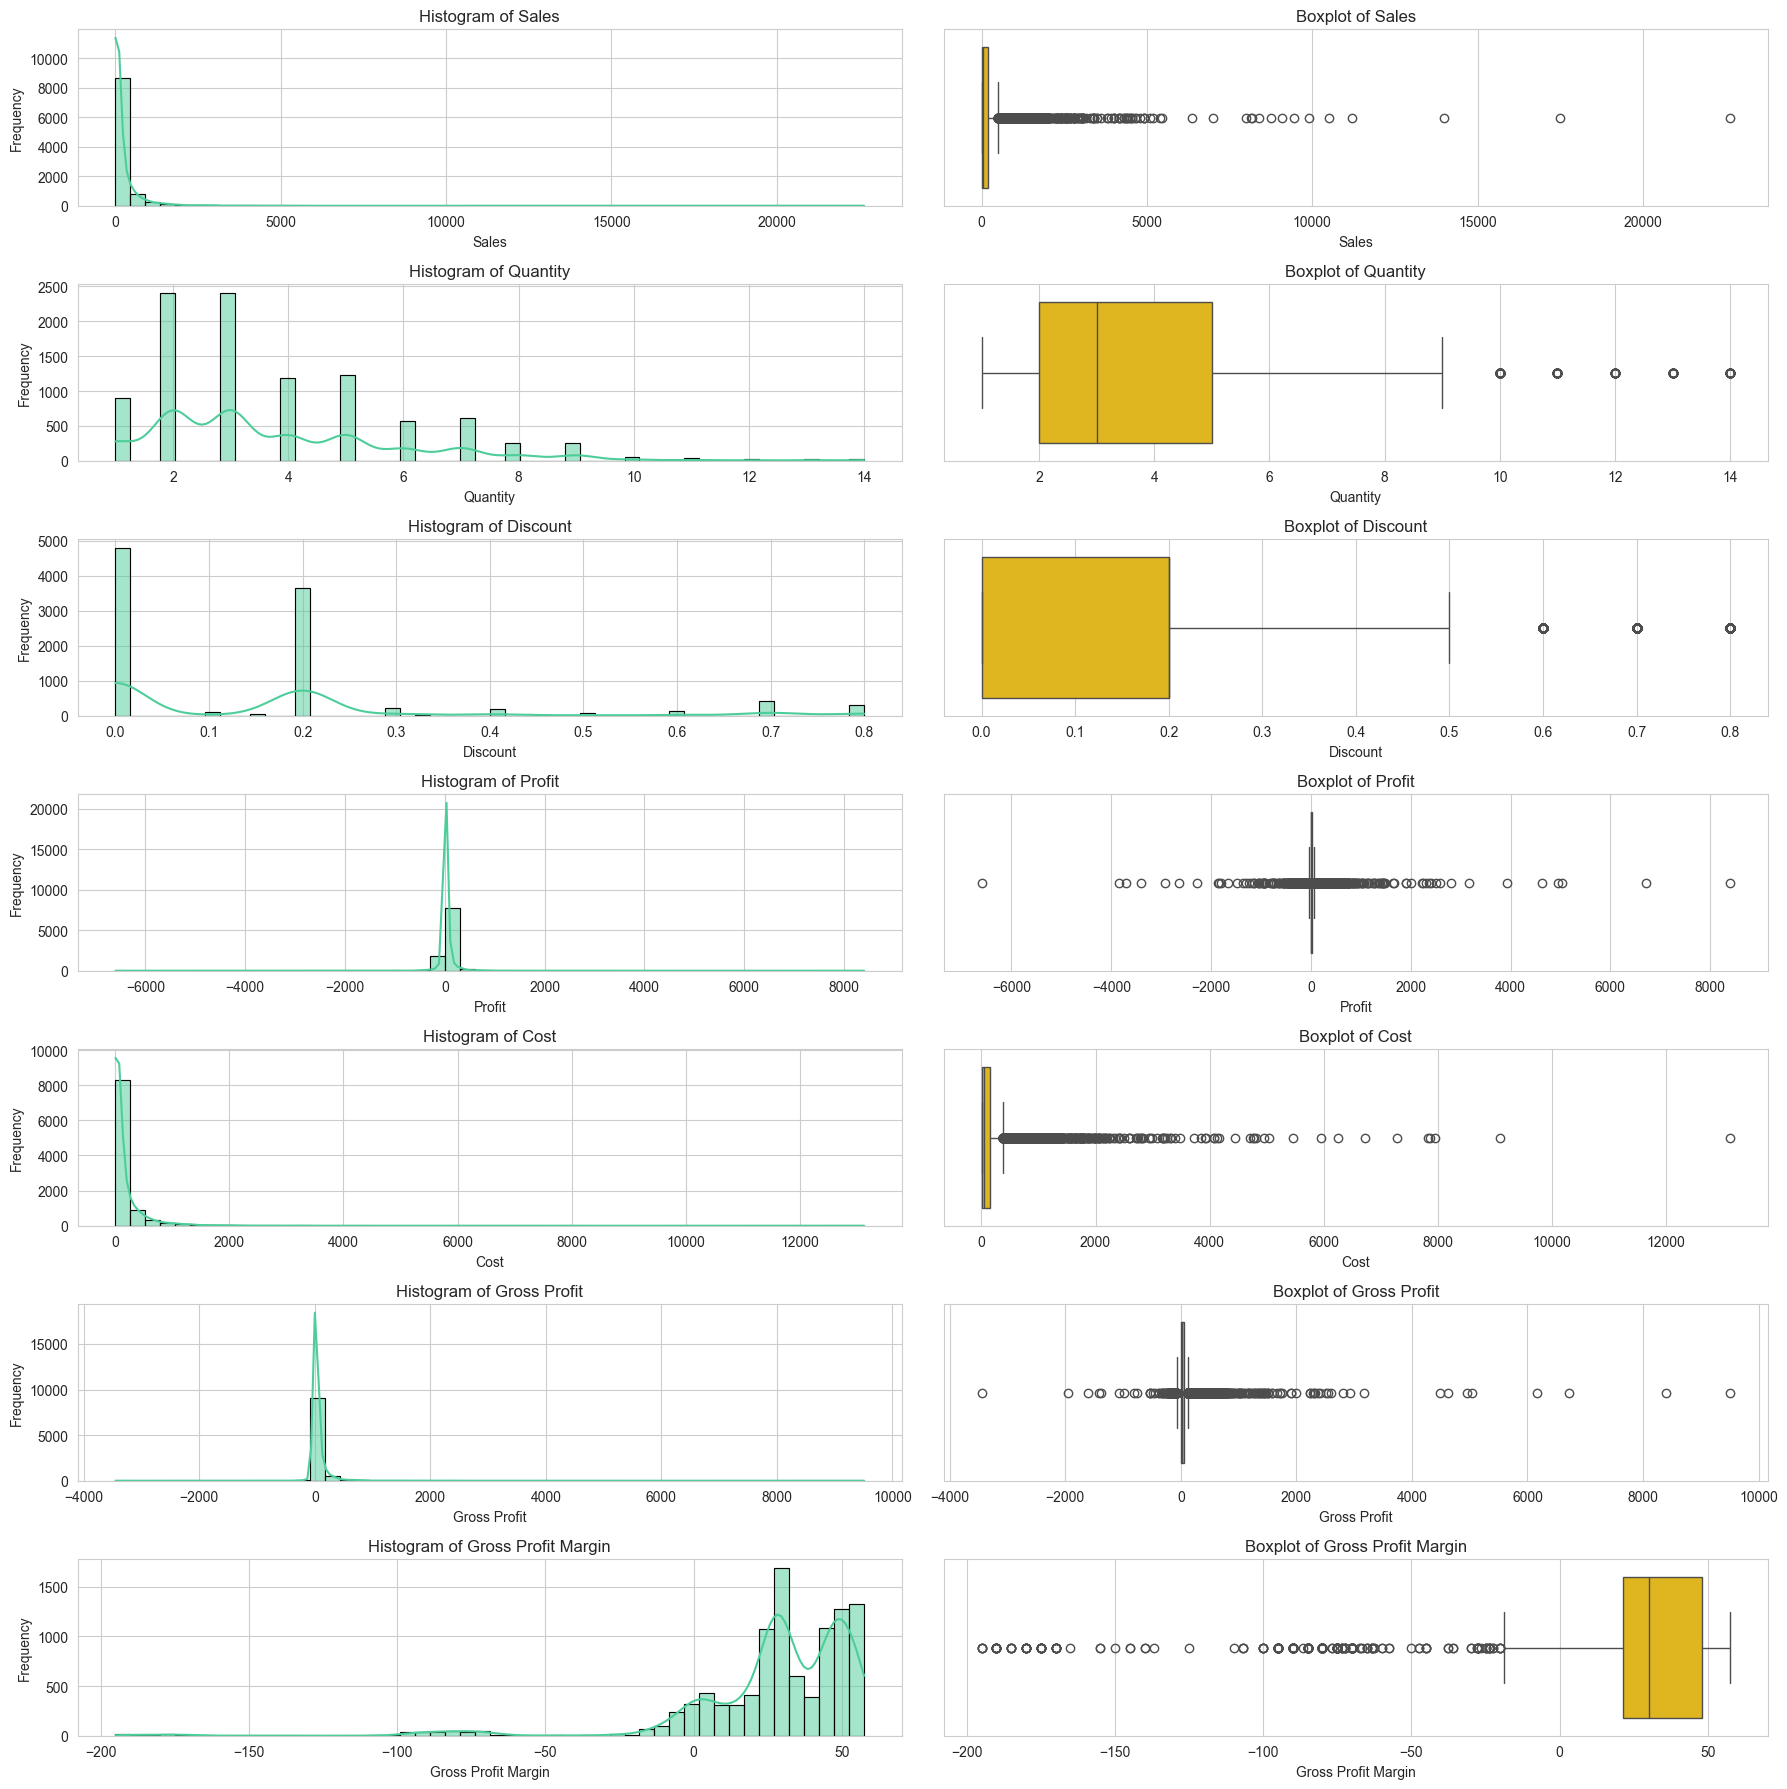

In [522]:
plt.figure(figsize=(18, 18))

for index, col in enumerate(df.columns[10:]):
    # Visualisasi Histogram
    plt.subplot(len(df.columns[10:]), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='#4CCD99', edgecolor='black', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Visualisasi Boxplot
    plt.subplot(len(df.columns[10:]), 2, index * 2 + 2)
    sns.boxplot(x=df[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Terlihat dari dataframe dan visualisasi di atas menunjukkan bahwa tidak ada satupun data variabel numerik yang terdistribusi normal. Oleh karena itu digunakan tes analisis dengan asumsi non-parametrik.

### Uji Korelasi

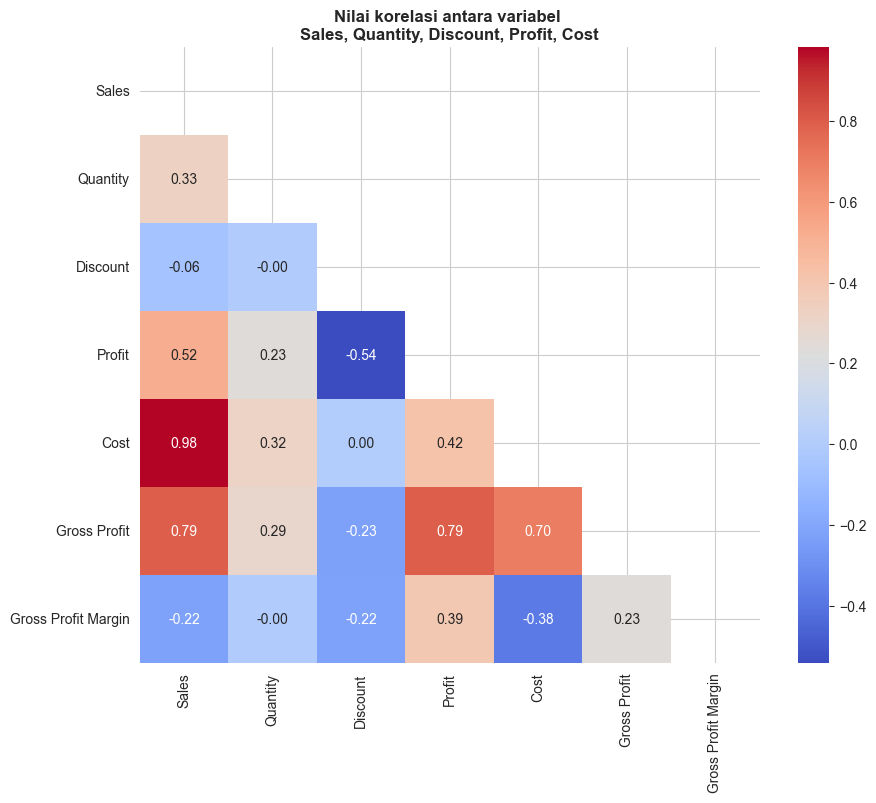

In [523]:
# Visualisasi Heatmap
df_numerik=df.select_dtypes('number').corr(method='spearman')
mask=np.triu(np.ones_like(df_numerik, dtype=bool))
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerik, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Nilai korelasi antara variabel \nSales, Quantity, Discount, Profit, Cost', fontsize=12, fontweight='bold')
plt.show()

Matriks korelasi ini dapat menjelaskan tentang korelasi antar fitur numerikal. 

Uji korelasi ini menunjukkan bahwa:
* `Sales` dan `Cost` Memiliki korelasi positif yang tinggi (0.91), hal ini menunjukkan bahwa produk dengan harga tinggi akan memberikan jumlah sales yang tinggi
* `Discount` dan `Profit` Memiliki korelasi negatif (-0.54), hal ini menunjukkan bahwa produk dengan diskon tinggi akan memberikan profit yang rendah, begitu pula sebaliknya


### Distribusi `Segment`

In [524]:
# Dataframe Segment & Count
segment_count=df['Segment'].value_counts().reset_index()
segment_count.columns=['Segment', 'Count']
segment_count

,Segment,Count
0,SMB,5191
1,Strategic,3020
2,Enterprise,1783


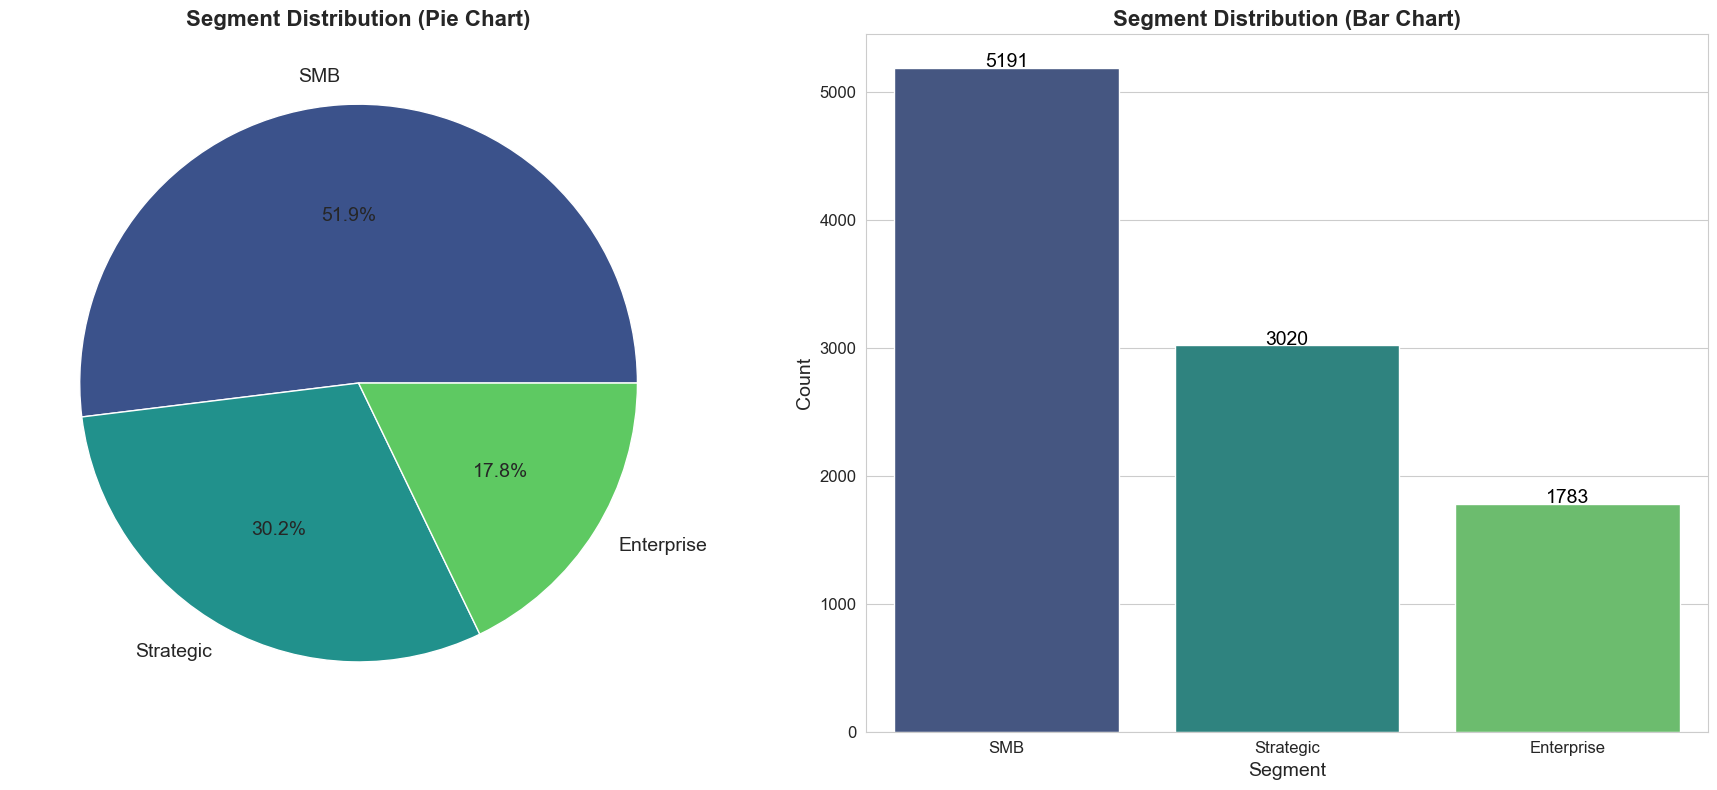

In [525]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Visualisasi Pie Chart
axes[0].pie(segment_count['Count'], 
            labels=segment_count['Segment'], 
            autopct='%1.1f%%', 
            colors=sns.color_palette('viridis', len(segment_count)),
            textprops={'fontsize': 14})
axes[0].set_title('Segment Distribution (Pie Chart)', fontsize=16, fontweight='bold')

# Visualisasi Bar Chart
sns.barplot(x='Segment', y='Count', data=segment_count, palette='viridis', ax=axes[1])
axes[1].set_title('Segment Distribution (Bar Chart)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Segment', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Label
for index, value in enumerate(segment_count['Count']):
    axes[1].text(index, value + 5, str(value), color='black', ha="center", fontsize=14)

plt.tight_layout()
plt.show()

Distribusi ini menunjukkan bahwa sebagian besar *customer* yang melakukan pemesanan pada perusahaan SaaS ini terdapat pada `Segment` SMB. *Segment* SMB mencakup separuh dari keseluruhan *customer* sementara *Segment* Strategic dan Enterprise hanya mencakup kurang dari separuh *customer*.

Tetapi apakah jumlah distribusi segmen dapat menggambarkan jumlah profit dan transaksi keseluruhan?

In [526]:
# Membuat dataframe segmen dengan jumlah sales dan jumlah profit
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
segment_sales_profit.columns = ['Segment', 'Total Sales', 'Total Profit']
segment_sales_profit

,Segment,Total Sales,Total Profit
0,Enterprise,4.296531e+05,60298.6785
1,SMB,1.161401e+06,134119.2092
2,Strategic,7.061464e+05,91979.1340


In [527]:
segment_analysis = pd.merge(segment_count, segment_sales_profit, on='Segment')

# Korelasi Spearman digunakan karena kedua data tidak terdistribusi normal dan berupa continous
import scipy.stats as stats

# Korelasi antara Count dengan Total Sales
corr_sales, p_value_sales = stats.spearmanr(segment_analysis['Count'], segment_analysis['Total Sales'])

if p_value_sales > 0.05:
    print(f'''pvalue = {i:.5f}. pvalue > 0.05. Fail to reject Ho.
Kita TIDAK punya cukup bukti untuk mengatakan bahwa Jumlah Segment memiliki kaitan dengan Jumlah Sales.
''')
else:
    print(f'''pvalue = {i:.5f}. pvalue < 0.05. Reject Ho.
Kita punya cukup bukti untuk mengatakan bahwa Jumlah Segment memiliki kaitan dengan Jumlah Sales.
        ''')

pvalue = 6.00000. pvalue < 0.05. Reject Ho.
Kita punya cukup bukti untuk mengatakan bahwa Jumlah Segment memiliki kaitan dengan Jumlah Sales.
        


In [528]:
# Korelasi antara Count dengan Total Profit
corr_profit, p_value_profit = stats.spearmanr(segment_analysis['Count'], segment_analysis['Total Profit'])

if p_value_profit > 0.05:
    print(f'''pvalue = {p_value_profit:.5f}. pvalue > 0.05. Fail to reject Ho.
Kita TIDAK punya cukup bukti untuk mengatakan bahwa Jumlah Segment memiliki kaitan dengan Jumlah Profit.
''')
else:
    print(f'''pvalue = {p_value_profit:.5f}. pvalue < 0.05. Reject Ho.
Kita punya cukup bukti untuk mengatakan bahwa Jumlah Segment memiliki kaitan dengan Jumlah Profit.
        ''')

pvalue = 0.00000. pvalue < 0.05. Reject Ho.
Kita punya cukup bukti untuk mengatakan bahwa Jumlah Segment memiliki kaitan dengan Jumlah Profit.
        


Dikarenakan terdapat kita memiliki cukup bukti dengan korelasi signifikan, mari kita ranking total *sales* dan *profit* berdasarkan segmen.

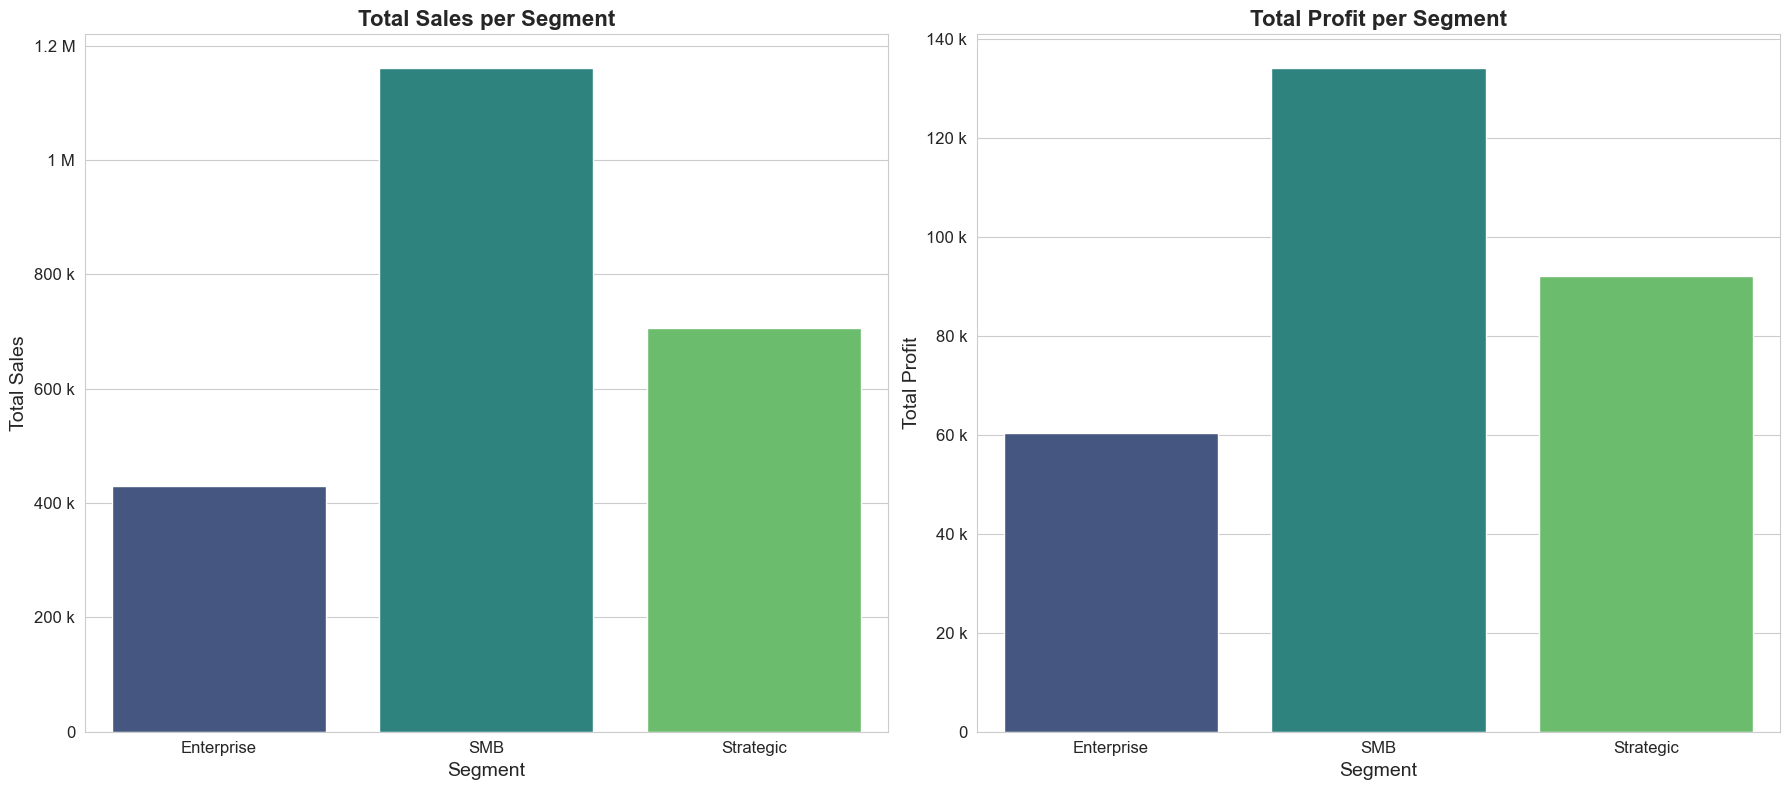

In [529]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Visualisasi Total Sales per Segment
sns.barplot(data=segment_sales_profit, x='Segment', y='Total Sales', ax=axes[0], palette='viridis')
axes[0].set_title('Total Sales per Segment', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Segment', fontsize=14)
axes[0].set_ylabel('Total Sales', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].yaxis.set_major_formatter(ticker.EngFormatter())

# Visualisasi Total Profit per Segment
sns.barplot(data=segment_sales_profit, x='Segment', y='Total Profit', ax=axes[1], palette='viridis')
axes[1].set_title('Total Profit per Segment', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Segment', fontsize=14)
axes[1].set_ylabel('Total Profit', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].yaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()
plt.show()

Ternyata ranking jumlah segment benar-benar sama dengan ranking total *sales*/*profit* per *segment*. Dimana *customer* dengan segmen SMB merupakan kontributor tertinggi dalam total *sales* dan total *profit*. Diiringi dengan segmen *strategic* dan terakhir segmen *enterprise*.

Bagaimana dengan jika dibandingkan dengan jumlah industri?

### Distribusi `Industry`

In [530]:
# Membuat dataframe baru industry dengan sales, profit, persen sales, dan persen profit
industry_sales_profit=df.groupby('Industry')[['Sales', 'Profit']].sum().reset_index()
industry_sales_profit=industry_sales_profit.sort_values(by='Sales', ascending=False).reset_index(drop=True)
industry_sales_profit['Percent Sales']=industry_sales_profit['Sales'] / total_sales * 100
industry_sales_profit['Percent Profit']=industry_sales_profit['Profit'] / total_sales * 100
industry_sales_profit

,Industry,Sales,Profit,Percent Sales,Percent Profit
0,Finance,474150.4844,50348.9696,20.640358,2.191753
1,Energy,304644.1409,45282.3137,13.261537,1.971195
2,Manufacturing,295192.3812,38413.1064,12.850090,1.672170
3,Healthcare,273183.2882,31969.0932,11.892007,1.391654
4,Tech,263169.0277,24615.0436,11.456074,1.071523
5,Consumer Products,224044.1422,37018.0077,9.752919,1.611440
6,Retail,223072.0720,30207.8208,9.710604,1.314984
7,Communications,120962.2365,13976.3410,5.265636,0.608407
8,Transportation,90191.3276,7402.6967,3.926140,0.322249
9,Misc,28591.7596,7163.6290,1.244635,0.311842


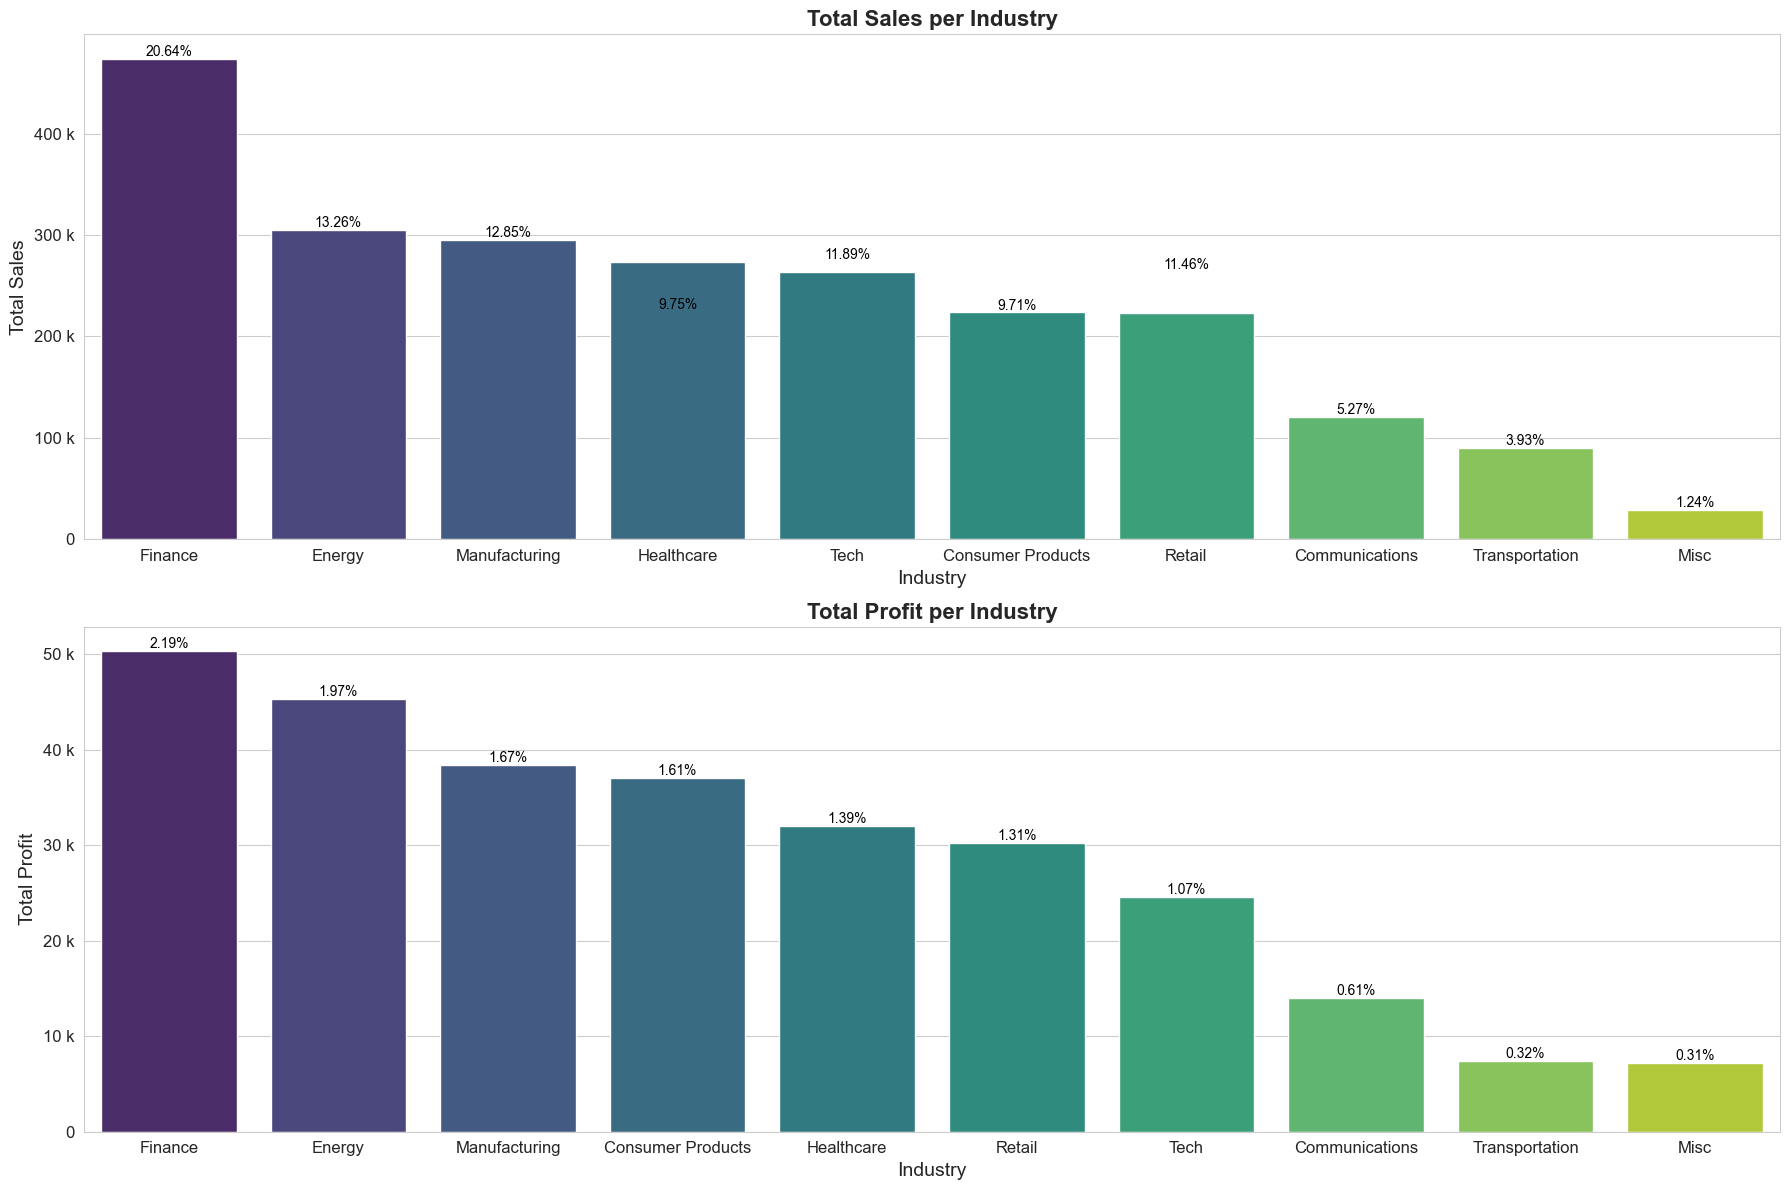

In [531]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

# Visualisasi Total Sales per Segment
sns.barplot(data=industry_sales_profit, x='Industry', y='Sales', ax=axes[0], palette='viridis')
axes[0].set_title('Total Sales per Industry', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Industry', fontsize=14)
axes[0].set_ylabel('Total Sales', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].yaxis.set_major_formatter(ticker.EngFormatter())

# Visualisasi Total Profit per Industry
industry_sales_profit=industry_sales_profit.sort_values(by='Profit', ascending=False).reset_index(drop=True)    # Diurutkan kembali berdasarkan Profit
sns.barplot(data=industry_sales_profit, x='Industry', y='Profit', ax=axes[1], palette='viridis')
axes[1].set_title('Total Profit per Industry', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Industry', fontsize=14)
axes[1].set_ylabel('Total Profit', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].yaxis.set_major_formatter(ticker.EngFormatter())

for index, value in enumerate(industry_sales_profit['Sales']):
    percent_sales = industry_sales_profit.iloc[index]['Percent Sales']
    axes[0].text(index, value, f'{percent_sales:.2f}%', color='black', ha="center", va="bottom")

for index, value in enumerate(industry_sales_profit['Profit']):
    percent_sales = industry_sales_profit.iloc[index]['Percent Profit']
    axes[1].text(index, value, f'{percent_sales:.2f}%', color='black', ha="center", va="bottom")

plt.tight_layout()
plt.show()

Jika dilihat dalam barplot di atas, *customer* dengan industri keuangan (*finance*) memiliki total *sales* dan Total *profit* nomor satu. 
Industri keuangan ini mencakup 20% dari total *sales* dan 2% dari total *profit*. 

Dapat disimpulkan bahwa *Customer* yang paling sering melakukan transaksi jual beli produk SaaS dari tahun 2020 hingga 2023 ialah *Customer* dari industri keuangan. Maka dari itu fokus penjualan produk terhadap *customer* dengan perusahaan/bisnis dengan industri keuangan, energi, manufaktur, produk konsumen, dan kesehatan (Top 5 Profit).

### Distribusi `Country`

Dengan melihat *Country*, kita dapat melihat asal dari perusahaan *customer*. Bagaimana jumlah transaksi jika didistribusikan berdasarkan *Country*? Apakah *Country* mempengaruhi jumlah transaksi?

In [532]:
# Membuat dataframe baru yaitu transaksi berdasarkan negara
region_transactions=df.groupby('Country')['Order ID'].count().reset_index()
region_transactions.columns=['Country', 'Transaction Count']
region_transactions=region_transactions.sort_values(by='Transaction Count', ascending=False)
total_transactions=region_transactions['Transaction Count'].sum()
region_transactions['Percent Transaction']=region_transactions['Transaction Count'] / total_transactions * 100
region_transactions.head()

,Country,Transaction Count,Percent Transaction
47,United States,2001,20.022013
46,United Kingdom,1141,11.416850
24,Japan,985,9.855914
15,France,587,5.873524
5,Canada,506,5.063038


In [533]:
countries=df['Country'].unique()

# Dikarenakan data tidak terdistribusi normal, menggunakan uji hipotesis t-Test Kruskal-Wallis 
from scipy.stats import kruskal
stat,p_value=kruskal(*[region_transactions[region_transactions['Country']==country]['Transaction Count'] for country in countries])

# Interpretasi
if p_value < 0.05:
    print(f'''pvalue = {p_value:.5f}. pvalue > 0.05. Fail to reject Ho.
Kita TIDAK punya cukup bukti untuk mengatakan bahwa Country memiliki kaitan dengan jumlah transaksi.
''')
else:
    print(f'''pvalue = {p_value:.5f}. pvalue < 0.05. Reject Ho.
Kita punya cukup bukti untuk mengatakan bahwa Country memiliki kaitan dengan jumlah transaksi.
          ''')


pvalue = 0.47256. pvalue < 0.05. Reject Ho.
Kita punya cukup bukti untuk mengatakan bahwa Country memiliki kaitan dengan jumlah transaksi.
          


Ternyata *Country* dapat mempengaruhi jumlah transaksi. Mari kita lihat bagaimana *Top 5* negara yang memiliki transaksi tertinggi dan juga bagaimana persen transaksi dibandingkan dengan keseluruhan total transaksi.

In [534]:
# Membuat dataframe baru hasil sorting region_transactions
top_5_region=region_transactions.reset_index().drop(columns='index').head(5)
top_5_region

,Country,Transaction Count,Percent Transaction
0,United States,2001,20.022013
1,United Kingdom,1141,11.416850
2,Japan,985,9.855914
3,France,587,5.873524
4,Canada,506,5.063038


In [535]:
# Membuat dataframe baru top 5 region berdasarkan sales dan persen sales
region_sales=df.groupby('Country')['Sales'].sum().reset_index()
region_sales=region_sales.sort_values(by='Sales', ascending=False).reset_index().drop(columns='index')
total_sales=region_sales['Sales'].sum()
region_sales['Percent Sales']=region_sales['Sales'] / total_sales * 100
top_5_region_sales=region_sales.head(5)
top_5_region_sales

,Country,Sales,Percent Sales
0,United States,457687.6315,19.923710
1,United Kingdom,313169.8810,13.632673
2,Japan,170188.0458,7.408497
3,Canada,138641.2700,6.035226
4,France,116511.9140,5.071908


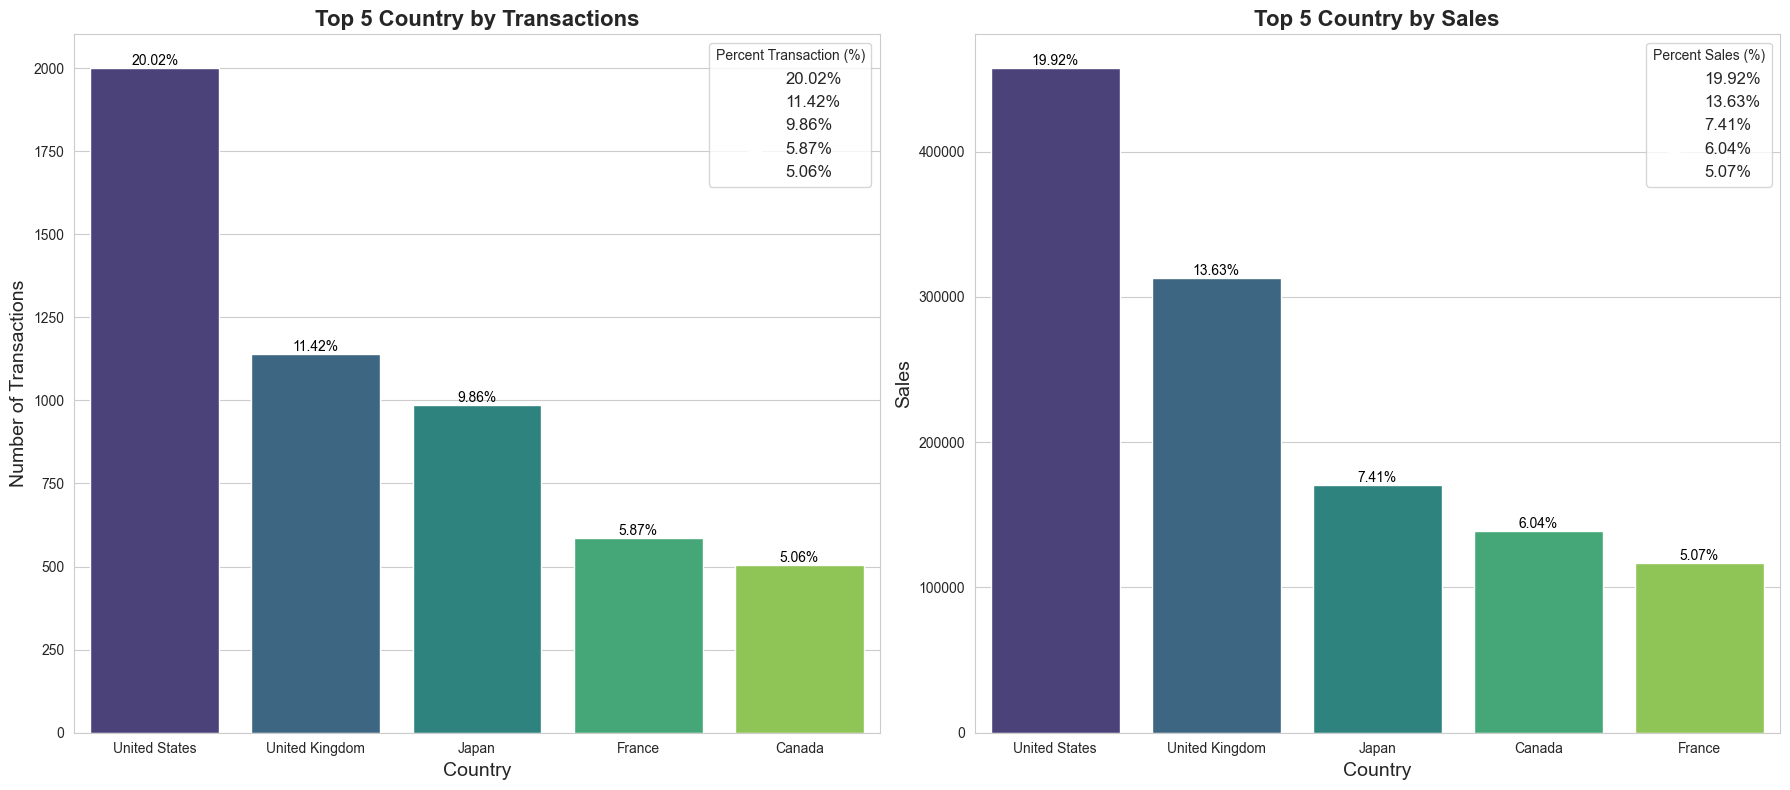

In [536]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Visualisasi barplot Top 5 Countries by Transactions
sns.barplot(data=top_5_region, x='Country', y='Transaction Count', palette='viridis', ax=axes[0])
axes[0].set_title('Top 5 Country by Transactions', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Country', fontsize=14)
axes[0].set_ylabel('Number of Transactions', fontsize=14)

for index, value in enumerate(top_5_region['Transaction Count']):
    percent_transaction = top_5_region.iloc[index]['Percent Transaction']
    axes[0].text(index, value, f'{percent_transaction:.2f}%', color='black', ha="center", va="bottom")

handles_transactions=[
    plt.Line2D([0], [0], color='white', marker='o', markersize=10, markerfacecolor='white', label=f'{value:.2f}%')
    for value in top_5_region['Percent Transaction']
]
axes[0].legend(handles=handles_transactions, title='Percent Transaction (%)', loc='best', fontsize=12)

# Visualisasi barplot Top 5 Countries by Sales
sns.barplot(data=top_5_region_sales, x='Country', y='Sales', palette='viridis', ax=axes[1])
axes[1].set_title('Top 5 Country by Sales', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Country', fontsize=14)
axes[1].set_ylabel('Sales', fontsize=14)

for index, value in enumerate(top_5_region_sales['Sales']):
    percent_sales = top_5_region_sales.iloc[index]['Percent Sales']
    axes[1].text(index, value, f'{percent_sales:.2f}%', color='black', ha="center", va="bottom")

handles_sales=[
    plt.Line2D([0], [0], color='white', marker='o', markersize=10, markerfacecolor='white', label=f'{value:.2f}%')
    for value in top_5_region_sales['Percent Sales']
]
axes[1].legend(handles=handles_sales, title='Percent Sales (%)', loc='best', fontsize=12)


plt.tight_layout()
plt.show()

Berdasarkan grafik distribusi ini dapat diketahui bahwa sebagian besar *Customer* yang melakukan transaksi berada pada *Region* Amerika Serikat. 
Selain itu *customer* yang berasal dari Amerika Serikat juga memiliki dampak yang tinggi terhadap *sales* dengan persentase yang sama, yaitu hampir seperlima dari total *sales*. 

Kita dapat menyimpulkan bahwa *customer* Amerika Serikat merupakan negara dengan *customer* terbanyak dengan seperlima jumlah transaksi dan *sales* pada perusahaan SaaS dari tahun 2020 hingga 2023. Oleh karena itu Fokus penjualan produk terhadap *customer* yang berada di Amerika Serikat, lalu diikuti United Kingdom, Jepang, Perancis, dan Kanada.


Bagaimana dengan distribusi *sales* berdasarkan segmen masing-masing *country*? Untuk distribusi segmen terlihat, akan kita filter Top 10.

### Distribusi `Segment` dan `Country`

In [537]:
# Membuat dataframe pivot 
country_sales=df.groupby('Country')['Sales'].sum().reset_index()
top_10_countries=country_sales.nlargest(10, 'Sales')['Country']     # Dicari 10 negara terbesar berdasarkan sales
top_10_df=df[df['Country'].isin(top_10_countries)]                  # Dicari 10 negara terbesar berdasarkan dataframe top 10 negara

segment_country_sales=top_10_df.groupby(['Country', 'Segment'])['Sales'].sum().reset_index()

pivot_table=segment_country_sales.pivot(index='Country', columns='Segment', values='Sales')
pivot_table['Total Sales'] = pivot_table.sum(axis=1)
pivot_table=pivot_table.sort_values(by='Total Sales', ascending=True)
display(pivot_table.sort_values(by='Total Sales', ascending=False))
pivot_table=pivot_table.drop(columns='Total Sales')                     # drop agar total sales tidak masuk ke dalam visualisasi pivot

Segment,Enterprise,SMB,Strategic,Total Sales
Country,,,,
United States,80876.8250,229636.080,147174.7265,457687.6315
United Kingdom,57715.9230,177346.845,78107.1130,313169.8810
Japan,20303.5480,95976.378,53908.1198,170188.0458
Canada,25047.6400,73866.520,39727.1100,138641.2700
France,18482.5600,66899.293,31130.0610,116511.9140
Germany,34294.9205,32701.196,22477.5915,89473.7080
Australia,18999.6260,45182.195,15984.2800,80166.1010
Mexico,10854.1390,43194.024,24209.9730,78258.1360
Brazil,16168.1500,36709.911,23391.5530,76269.6140


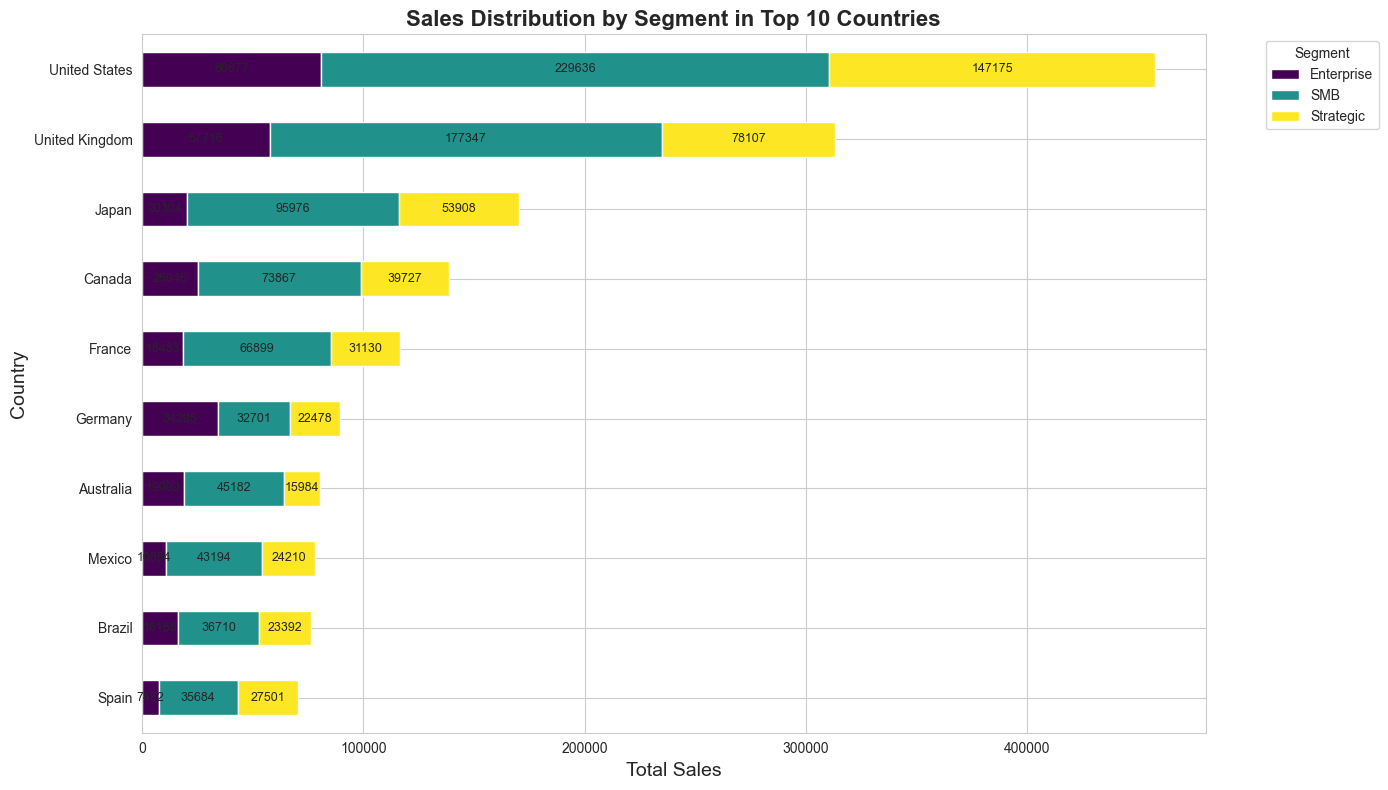

In [538]:
# Visualisasi Data Pivot
fig, ax = plt.subplots(figsize=(14, 8))
pivot_table.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)

plt.title('Sales Distribution by Segment in Top 10 Countries', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Label
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f', fontsize=9)

plt.tight_layout()
plt.show()

Terlihat dari Top 10 Negara yang memiliki *sales* terbanyak, SMB mendominasi dari kedua perusahaan/bisnis lainnya.

Selanjutnya kita akan melakukan analisis produk. Mendapatkan produk sesuai dengan adalah tujuan utama dari *customer* melakukan transaksi pemesanan. Bagaimanakah *Sales* dan *Profit* dari produk-produk yang dijual? 

Bagaimanakah urutan produk dari *Sales* dan *Profit* terbesar hingga ke terkecil?

### Analisis `Product`

In [539]:
# Membuat dataframe baru produk dengan sales
product_sales=df.groupby('Product')[['Sales']].sum().reset_index()
product_sales=product_sales.sort_values(by='Sales', ascending=False).reset_index().drop(columns='index')
product_sales

,Product,Sales
0,ContactMatcher,410378.2650
1,FinanceHub,340935.4150
2,Site Analytics,330007.0540
3,Marketing Suite - Gold,223843.6080
4,Big Ol Database,189238.6310
5,Data Smasher,167380.3180
6,Alchemy,149528.0300
7,Support,125152.7440
8,Marketing Suite,114879.9963
9,OneView,107532.1610


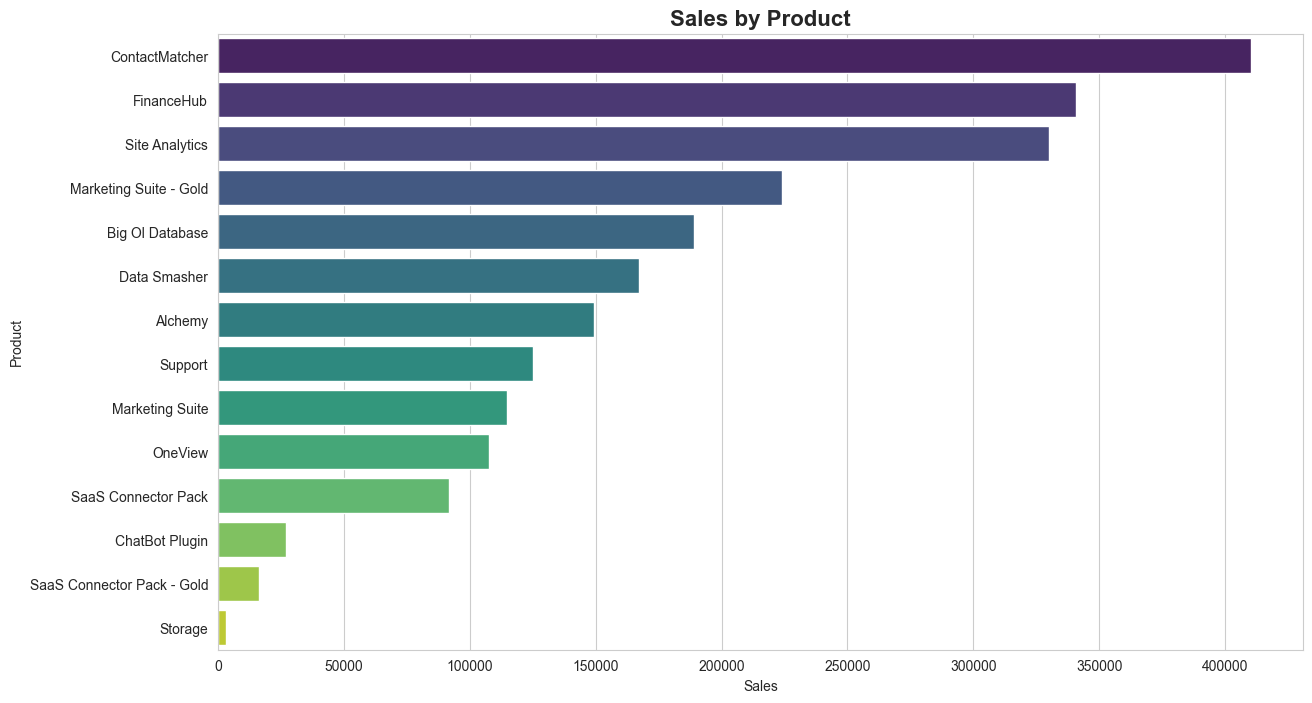

In [540]:
# Visualisasi produk dengan sales
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Product', data=product_sales, palette='viridis')
plt.title('Sales by Product', fontsize=16, fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()

Barplot di atas menyatakan bahwa produk ContactMatcher memiliki *sales* tertinggi, dan produk Storage memiliki *sales* terendah. 
Bagaimana dengan Produk dan Profit?

In [541]:
# Membuat dataframe baru produk dengan profit
product_profit=df.groupby('Product')[['Profit']].sum().reset_index()
product_profit=product_profit.sort_values(by='Profit', ascending=False).reset_index().drop(columns='index')
product_profit

,Product,Profit
0,Alchemy,55617.8249
1,Site Analytics,44515.7306
2,Data Smasher,41936.6357
3,Support,32864.4698
4,FinanceHub,32136.4203
5,Marketing Suite - Gold,21278.8264
6,OneView,18138.0054
7,SaaS Connector Pack,13059.1436
8,ContactMatcher,12496.2822
9,SaaS Connector Pack - Gold,6964.1767


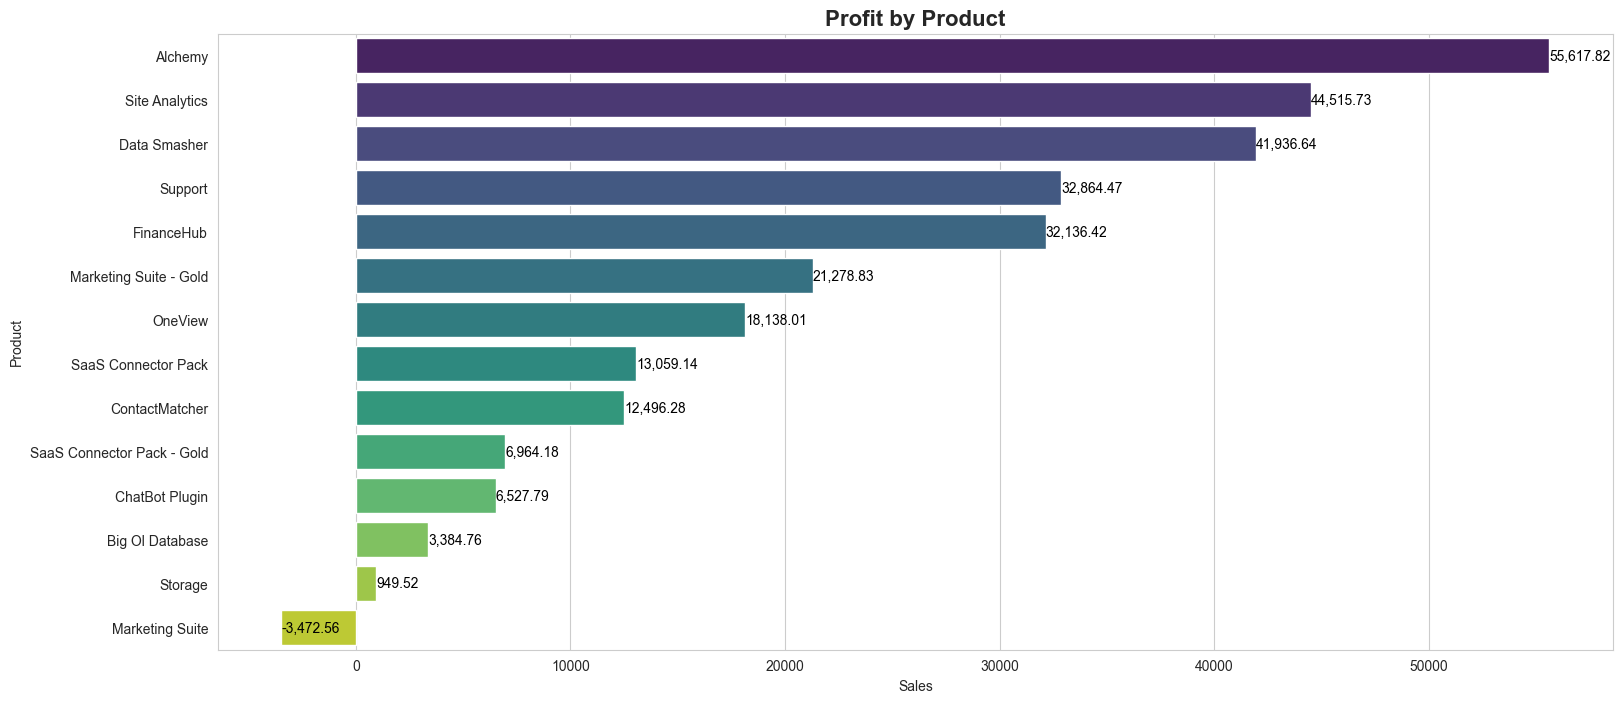

In [542]:
# Visualisasi produk dengan profit
plt.figure(figsize=(18, 8))
sns.barplot( data=product_profit, x='Profit', y='Product', palette='viridis')
plt.title('Profit by Product', fontsize=16, fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('Product')

for index, value in enumerate(product_profit['Profit']):
    plt.text(value, index, f'{value:,.2f}', color='black', ha="left", va="center")
    
plt.show()

Penjualan produk Alchemy memiliki *profit* tertinggi dalam pasar SaaS ini, akan tetapi penjualan produk Marketing Suite justru memiliki *profit* terendah berupa kerugian. 

Marketing Suite adalah perangkat untuk mengelola aktivitas *marketing*. Sementara produk Marketing Suite - Gold yang merupakan produk sama dengan Marketing Suite, hanya terdapat tambahan fitur untuk mempermudah pengguna. Tentunya produk *premium* ini seharusnya memiliki harga yang lebih mahal jika dibandingkan dengan produk normal yang sama. 

Akan tetapi penjualan produk Marketing Suite mengalami kerugian sebesar -3.472,56 USD. Sebaliknya produk Marketing Suite - Gold berupa versi *premium* dari Marketing Suite memiliki *profit* sebanyak 21.278,83 USD. Mengapa hal ini bisa terjadi?

### Analisis `Discount`

Untuk menjawab pertanyaan di atas, perlu dilakukan analisis diskon. Diskon merupakan strategi pemasaran berupa potongan harga yang diberikan pada suatu produk. Jika dilihat dari Uji Korelasi, diskon memiliki korelasi negatif yang kuat dengan *profit*. 

Maka dari itu analisis diskon dapat digunakan untuk menganalisis kerugian profit dari produk Marketing Suite.

In [543]:
# Membuat Dataframe baru untuk produk dengan sales, profit, diskon, dan gross profit
product_sales_profit_discount=df.groupby('Product')[['Sales', 'Profit', 'Discount','Gross Profit']].sum().reset_index()

# Diskon dimasukkan kepada kategori
product_sales_profit_discount['Discount Category'] = pd.qcut(product_sales_profit_discount['Discount'], 3, labels=['Low', 'Medium', 'High'])

product_sales_profit_discount=product_sales_profit_discount.sort_values(by='Discount', ascending=False).reset_index(drop=True)
product_sales_profit_discount

,Product,Sales,Profit,Discount,Gross Profit,Discount Category
0,ContactMatcher,410378.2650,12496.2822,650.35,100433.558600,High
1,Site Analytics,330007.0540,44515.7306,137.40,92608.669800,High
2,SaaS Connector Pack,91705.1640,13059.1436,132.40,21768.096400,High
3,FinanceHub,340935.4150,32136.4203,130.00,82600.570800,High
4,Support,125152.7440,32864.4698,117.20,40951.602600,High
5,OneView,107532.1610,18138.0054,77.60,25628.305100,Medium
6,Marketing Suite - Gold,223843.6080,21278.8264,63.20,34476.796000,Medium
7,Data Smasher,167380.3180,41936.6357,60.80,51738.637300,Medium
8,ChatBot Plugin,27118.7920,6527.7870,59.60,8348.617400,Medium
9,Marketing Suite,114879.9963,-3472.5560,48.14,17328.035041,Low


In [544]:
# Cek produk dengan diskon terbesar
df_discount_max=df[df['Discount']==df['Discount'].max()][['Product']].groupby('Product').value_counts()

# Cek produk dengan diskon terkecil
df_discount_min=df[df['Discount']==df['Discount'].min()][['Product']].groupby('Product').value_counts()

display(df_discount_max,df_discount_min)

Product
ContactMatcher    233
OneView           67 
Name: count, dtype: int64

Product
Alchemy                       22 
Big Ol Database               29 
ChatBot Plugin                498
ContactMatcher                409
Data Smasher                  471
FinanceHub                    372
Marketing Suite               60 
Marketing Suite - Gold        530
OneView                       271
SaaS Connector Pack           571
SaaS Connector Pack - Gold    152
Site Analytics                311
Storage                       128
Support                       974
Name: count, dtype: int64

Bagaimana dampak diskon terhadap *sales* dan *profit*?

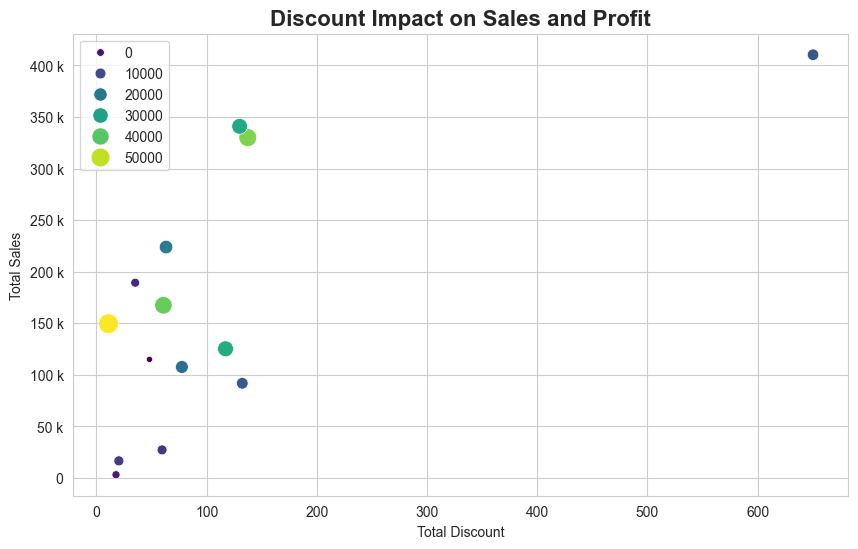

In [545]:
# Visualisasi dampak diskon terhadap sales dan profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_sales_profit_discount, x='Discount', y='Sales', hue='Profit', size='Profit', palette='viridis', sizes=(20, 200))
plt.title('Discount Impact on Sales and Profit', fontsize=16, fontweight='bold')
plt.xlabel('Total Discount')
plt.ylabel('Total Sales')
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

Terlihat dari scatter plot di atas, *total sales* memiliki korelasi yang berbanding lurus dengan total diskon. Sementara itu *profit* memiliki korelasi yang berbanding terbalik dengan total diskon.

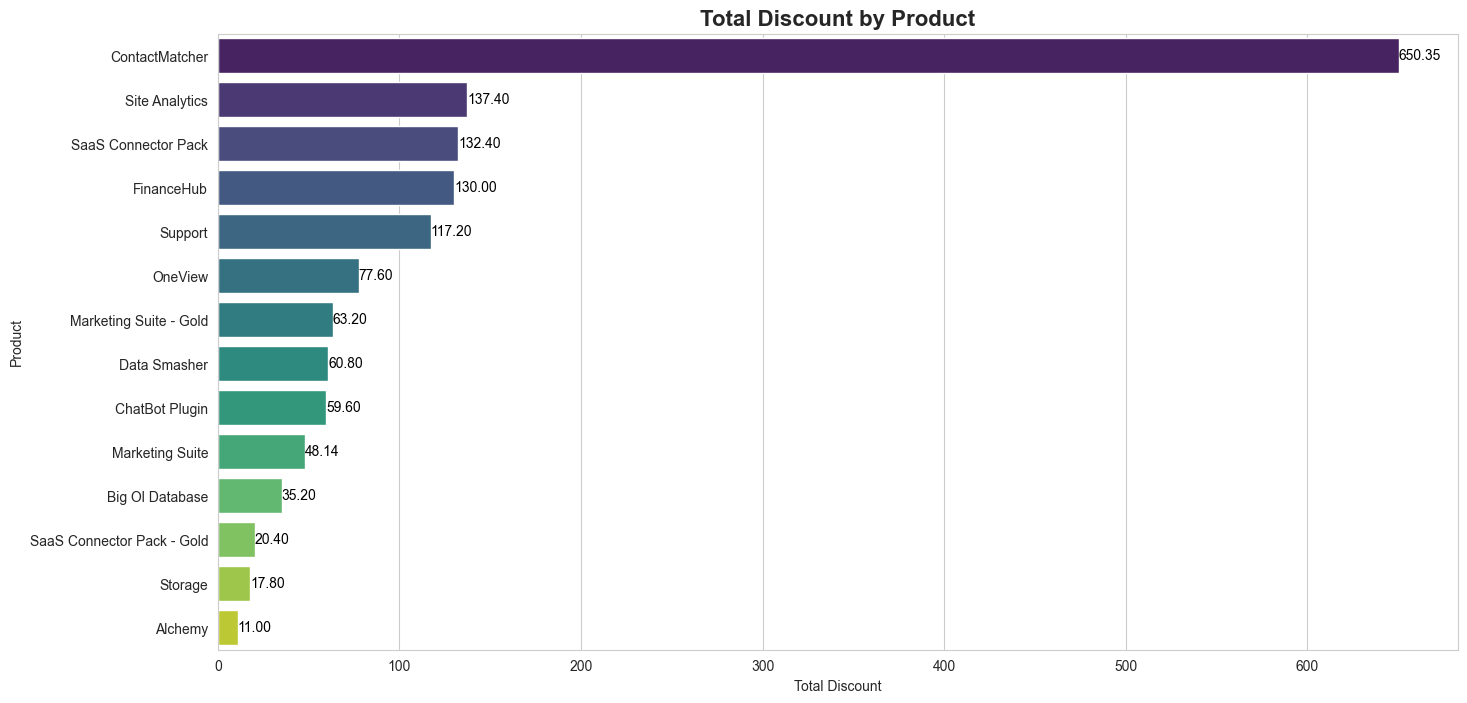

In [546]:
# Visualisasi Produk dengan Profit
plt.figure(figsize=(16, 8))
sns.barplot(data=product_sales_profit_discount, x='Discount', y='Product', 
            palette='viridis')
plt.title('Total Discount by Product', fontsize=16, fontweight='bold')
plt.xlabel('Total Discount')
plt.ylabel('Product')

for index, value in enumerate(product_sales_profit_discount['Discount']):
    plt.text(value, index, f'{value:,.2f}', color='black', ha="left", va="center")
    
plt.show()

Terlihat pada bar plot di atas, bahwa:

Produk Alchemy memiliki total diskon terendah. Jika dilihat dari sisi *sales* sangat wajar dikarenakan produk ini merupakan produk dengan *profit* tertinggi (Lihat bar plot "Profit by Product"). Akan tetapi jika dilihat dari sisi pemasaran merupakan hal yang sangat unik, dikarenakan *customer* biasanya akan mengambil produk dengan harga serendah mungkin untuk keuntungan maksimal. 

Oleh karena itu dapat disimpulkan bahwa produk Alchemy merupakan produk yang sangat laris bagi *customer* dan juga *profitable* bagi penjual (perusahaan SaaS).

Di sisi lain, produk Storage merupakan produk yang tidak laris bagi *customer* dan juga tidak *profitable* pagi penjual. Maka dari itu terdapat beberapa rekomendasi untuk memaksimalkan kepuasan *customer* dan penjual:
1. **Menaikkan harga diskon sehingga para *customer* tertarik untuk membeli produk**
1. **Meminta developer dari produk untuk menambah fitur terbaru pada produk tersebut**


Produk Marketing Suite berada pada *bottom* 5 produk dari total diskon. Artinya analisis total diskon tidak bisa menjawab mengapa Marketing Suite memiliki kerugian dalam *profit*. Bisa jadi terdapat faktor lain selain diskon yang dapat mempengaruhi net profit dari Marketing Suite, contohnya terdapat potongan lain seperti pajak atau biaya administrasi. Maka dari itu mari kita cek terlebih dahulu *Gross Profit* dari seluruh produk. 

In [547]:
# Gross Profit dimasukkan kepada kategori
product_sales_profit_discount['Gross Profit Category'] = pd.qcut(product_sales_profit_discount['Gross Profit'], 3, labels=['Low', 'Medium', 'High'])
product_sales_profit_discount=product_sales_profit_discount.sort_values(by='Gross Profit', ascending=False).reset_index(drop=True)
product_sales_profit_discount

,Product,Sales,Profit,Discount,Gross Profit,Discount Category,Gross Profit Category
0,ContactMatcher,410378.2650,12496.2822,650.35,100433.558600,High,High
1,Site Analytics,330007.0540,44515.7306,137.40,92608.669800,High,High
2,FinanceHub,340935.4150,32136.4203,130.00,82600.570800,High,High
3,Alchemy,149528.0300,55617.8249,11.00,73617.555300,Low,High
4,Data Smasher,167380.3180,41936.6357,60.80,51738.637300,Medium,High
5,Big Ol Database,189238.6310,3384.7569,35.20,50150.738400,Low,Medium
6,Support,125152.7440,32864.4698,117.20,40951.602600,High,Medium
7,Marketing Suite - Gold,223843.6080,21278.8264,63.20,34476.796000,Medium,Medium
8,OneView,107532.1610,18138.0054,77.60,25628.305100,Medium,Medium
9,SaaS Connector Pack,91705.1640,13059.1436,132.40,21768.096400,High,Low


Produk Marketing Suite dengan kategori diskon ***Low*** dan kategori *gross profit* ***Low***. Tentunya jika ada potongan biaya lain selain diskon akan menyebabkan kerugian *profit*. Maka dari itu terdapat beberapa solusi agar *profit* Marketing Suite tidak mengalami kerugian:
1. **Menurunkan diskon di tahun-tahun berikutnya agar kenaikan total diskon di tahun-tahun berikutnya tidak signifikan (setara atau kurang dari total diskon produk SaaS Connector Pack - Gold),**
1. **Menaikkan *sales* sehingga *gross profit* ikut meningkat**

Akan tetapi **solusi 1** ini bisa saja menjadi bumerang untuk keseluruhan *gross profit* dikarenakan dampak total diskon terhadap *profit* berbanding terbalik.
Maka dari itu lebih disarankan untuk menggunakan **solusi 2**, yaitu memfokuskan *sales* pada produk Marketing Suite. Sehingga kategori *gross profit* naik menjadi ***Medium*** atau ***High*** (*Gross Profit* > 25.000 USD) untuk menghindari kerugian *profit*.

# VI. Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita mendapat beberapa *insight* terkait tentang dataset SaaS Sales:
* Jumlah ***sales* yang tinggi** akan memberikan **produk dengan harga tinggi**. Produk dengan harga tinggi akan mempengaruhi *profit* dan *gross profit* dari penjualan
* Produk dengan **diskon tinggi** akan memberikan **profit yang rendah**. Begitu pula sebaliknya
* ***Total sales*** memiliki korelasi yang **berbanding lurus** dengan **total diskon**. Sementara itu ***profit*** memiliki korelasi yang **berbanding terbalik** dengan **total diskon**.

Dapat diambil kesimpulan bahwa *Customer* pasar SaaS ini memiliki karakteristik berupa:
* *Customer* sebagian besar terdapat pada *Segment* SMB. *Segment* SMB mencakup separuh dari keseluruhan customer sementara *Segment* Strategic dan Enterprise hanya mencakup kurang dari separuh customer.
* *Customer* dengan industri keuangan (*finance*) mencakup 20% jumlah transaksi dan 2% jumlah *profit* keseluruhan
* *Customer* sebagian besar berasal dari perusahaan bisnis Amerika Serikat, diikuti United Kingdom, Jepang, Perancis, dan Kanada
* *Customer* berasal dari Amerika Serikat memiliki dampak yang tinggi terhadap *sales* 
* *Customer* suka membeli produk Alchemy yaitu berupa perangkat data transformasi dan analisis untuk *Machine Learning*
* *Customer* tidak suka membeli produk Storage yaitu berupa perangkat Layanan *Cloud Storage*


**Rekomendasi**

Setelah kita melakukan analisis karakteristik *customer*, terdapat beberapa rekomendasi yang bisa dilakukan untuk meningkatkan *sales* dan *profit* penjualan produk.
1. Fokus penjualan produk terhadap *customer* yang berada di Amerika Serikat, lalu diikuti United Kingdom, Jepang, Perancis, dan Kanada (kelima negara ini jika dijumlahkan total sudah mencakup lebih dari 50% dari keseluruhan *customer*) beserta perusahaan/bisnis dengan industri keuangan, energi, manufaktur, produk konsumen, dan kesehatan.
1. Memberi perhatian kepada **Produk Alchemy** seperti menambah fitur/*update* pada model *Machine Learning* yang ada dalam produk ini. Sehingga para *customer* akan tetap menggunakan produk tersebut.
1. Menaikkan harga diskon **Produk Storage** sehingga para *customer* tertarik untuk membeli produk tersebut (total diskon sebaiknya tidak mengurangi hipotesis *gross profit* lebih dari 25.000 USD)
1. Meminta developer dari **Produk Storage** untuk menambah fitur terbaru dan layanan *storage* yang benar-benar unik agar produk ini menjadi salah satu pilihan *cloud storage* yang mudah dipakai oleh pengguna   
1. Penjualan Produk Marketing Suite mengalami kerugian *profit*. Untuk menghindari kerugian, disarankan untuk menaikkan *sales* dengan berbagai cara: 
    * Memberi diskon yang kecil (atau tidak sama sekali) agar kenaikan total diskon di tahun-tahun berikutnya tidak signifikan, atau
    * Kategori *gross profit* naik menjadi ***Medium*** atau ***High*** atau total *gross profit* mencapai lebih dari 25.000 USD
